In [ ]:
# Typo_Detection
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import json
import pandas as pd
from copy import copy
 
with open("/content/drive/MyDrive/Colab Notebooks/Project/data.json") as file:
    
    
    file = json.load(file)
    users = file.keys()
    j=0
    
    for i in users:
        j +=1
        
        user_data = file[i]
        
        
        keyboardInfo = user_data["keyboardInfo"]
        keyboardInput = user_data["keyboardInput"]
        
        height = keyboardInfo["Height"]
        width = keyboardInfo["Width"]
        
        if j==1:
            if len(keyboardInput)<10000:
                pass
            else:
                df = pd.DataFrame(keyboardInput)
                df['height'] = height
                df['width'] = width
                df['user'] = i
                print(i)
                print(df["Typo"].count())
                
                #analysis(df)
            
        else :
            if len(keyboardInput)<10000:
                pass
            else:
                df1 = pd.DataFrame(keyboardInput)
                df1['height'] = height
                df1['width'] = width
                df1['user'] = i
                
                print(i)
                print(df1["Typo"].count())
                df=pd.concat([df,df1] )

df1 = copy(df)

e038d81713be6360
162384
cd020986191b48db
18870
628fedb9b5c71949
62690
f28f68c62cac8c49
29811


In [ ]:
from google.colab import data_table
data_table.DataTable(df1)

In [ ]:
import numpy as np



df1.formatDate = pd.to_datetime(df1.formatDate)
df1['count']=1

df1.set_index(df1['formatDate'], inplace=True)
timeDF= df1[['formatDate','count']].groupby(df1.user).resample('H').agg({'count': np.sum}).fillna(0)
timeDF=timeDF.reset_index()

df1['key_'] = df1.formatDate.apply(lambda x: x.replace(minute=0))
df1['key'] = df1.key_.apply(lambda x: x.replace(second=0))
df1 = df1.drop('key_',axis=1)

df2 = pd.merge(df1,timeDF,left_on = ['user','key'],right_on=['user','formatDate'])
df2 = df2.drop(['key','formatDate_x','formatDate_y','count_x','index'],axis=1)

df2 = df2[df2['window']==1]
df2 = df2[df2['axis_X']!=0]
df2 = df2[df2['Typo']!=-200]
df2 = df2[df2['keyState']== 'Kor']

df2 = df2.dropna()
df2 = df2.drop(['mState'],axis=1)
df2 = df2.drop(['window','keyState'],axis=1)
df2 = df2.drop(df2[df2.Typo == -5].index)
df2.loc[df2['Typo'] > 0, 'Typo'] = 1
df2.rename(columns = {'count_y' : 'count'}, inplace = True)

df3 = df2.copy()
df3 = df3.reset_index()

df2.to_csv(path_or_buf="/content/test.csv")

In [ ]:

newDf = pd.DataFrame()
df_org = df3.copy()
amtT = 0
j = 0
amtNT = 0

for i,row in df2.iterrows():
  if row['Typo'] == 0:
    j = j + 1
    if(j > 259):
      # df_org = df3.drop(index = i)
      df2.drop(i, inplace=True)
      print("Dropped  " + str(i))

Streaming output truncated to the last 5000 lines.
Dropped  236238
Dropped  236239
Dropped  236240
Dropped  236241
Dropped  236242
Dropped  236243
Dropped  236247
Dropped  236248
Dropped  236249
Dropped  236250
Dropped  236251
Dropped  236252
Dropped  236253
Dropped  236254
Dropped  236255
Dropped  236256
Dropped  236257
Dropped  236258
Dropped  236259
Dropped  236260
Dropped  236261
Dropped  236262
Dropped  236263
Dropped  236264
Dropped  236265
Dropped  236266
Dropped  236267
Dropped  236268
Dropped  236269
Dropped  236270
Dropped  236271
Dropped  236272
Dropped  236273
Dropped  236274
Dropped  236275
Dropped  236276
Dropped  236277
Dropped  236278
Dropped  236279
Dropped  236280
Dropped  236281
Dropped  236282
Dropped  236283
Dropped  236284
Dropped  236285
Dropped  236286
Dropped  236287
Dropped  236288
Dropped  236289
Dropped  236290
Dropped  236291
Dropped  236292
Dropped  236296
Dropped  236297
Dropped  236298
Dropped  236299
Dropped  236300
Dropped  236301
Dropped  236302
Dropp

In [ ]:
df2[df2["Typo"] == 0].count()

touchTime    259
axis_X       259
axis_Y       259
Typo         259
axis_Z       259
touchSize    259
codenum      259
touchedX     259
touchedY     259
height       259
width        259
user         259
count        259
dtype: int64

In [ ]:
import numpy as np
from keras import backend
from keras.models import Sequential
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.core import Activation, Flatten, Dense
from keras.utils import np_utils
from keras.optimizers import SGD, RMSprop, Adam
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras import optimizers


## 트레인, 테스트 셋 준비 
# df = pd.read_csv("Fixed.csv")
df = df2.copy()
df = df.reset_index()
#X = X[0:4000]
# df= df[df['user']=='e038d81713be6360'] #코드넘버 다름
# df= df[df['user']=='cd020986191b48db'] #5:5
# df= df[df['user']=='628fedb9b5c71949'] #7:3
#df= df[df['user']=='f28f68c62cac8c49'] #코드넘버 다름

df = df.reset_index()
from sklearn.model_selection import train_test_split

print(pd.unique(df.user))

df = df.sample(frac=1).reset_index(drop=True)


X = df[['touchedX','touchedY','axis_Z']]
y = df['Typo']
print("Amount of categories: " + str(len(y.unique())))

#df = pd.DataFrame(arr)

X_t, X_te, y_tra, y_te = train_test_split(X,y,test_size = 0.2,shuffle = False)

X_train = X_t.values
X_test = X_te.values
y_train = y_tra.values
y_test = y_te.values

X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train ,test_size = 0.2, shuffle = False)

print(y_test)

print("y_train")
print(len(pd.unique(y_train)))
print(pd.unique(y_train))
print(y_train.shape)
print("y_test")
print(len(pd.unique(y_test)))
print(pd.unique(y_test))
print(y_test.shape)
print("y_val")

['e038d81713be6360' 'cd020986191b48db' '628fedb9b5c71949']
Amount of categories: 2
[0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 1
 1 1 0 0 0 1 1 0 1 1 0 1 0 1 1 1 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 1 1 1 0 1
 1 0 1 1 0 1 1 0 0 0 1 1 0 1 1 1 1 0 0 0 0 1 1 1 0 0 1 0 0 1]
y_train
2
[1 0]
(331,)
y_test
2
[0 1]
(104,)
y_val


In [ ]:
#######인코딩

from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()

train_encoder=encoder.fit(y_test.reshape(-1,1))

y_train_encoded=train_encoder.transform(y_train.reshape(-1,1))
y_test_encoded=train_encoder.transform(y_test.reshape(-1,1))
y_val_encoded=train_encoder.transform(y_val.reshape(-1,1))

y_train = y_train_encoded.toarray()
y_test = y_test_encoded.toarray()
y_val = y_val_encoded.toarray()

print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(331, 2)
(104, 2)
(83, 2)


In [ ]:
## 딥러닝 모델 설계

model = Sequential() 
# model.add(Activation('relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
# model.add(Flatten())
# model.add(Dense(15, activation='sigmoid'))
model.add(Dense(2, activation='sigmoid'))
adam = optimizers.RMSprop(0.001)
model.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])

history= model.fit(X_train, y_train, epochs=200, batch_size=64,validation_split=0.2)
test_loss, test_acc = model.evaluate(X_test, y_test)
print('test_acc: ', test_acc)
print('test_loss: ', test_loss)

df3['user2']= df3['user']
#df3.groupby(df3.user).apply(predict_per_user)
# validation_data=(X_val,y_val)

Epoch 1/200
5/5 [==============================] - 0s 26ms/step - loss: 50.8085 - accuracy: 0.5341 - val_loss: 16.7765 - val_accuracy: 0.4627
Epoch 2/200
5/5 [==============================] - 0s 5ms/step - loss: 10.1478 - accuracy: 0.5265 - val_loss: 7.0640 - val_accuracy: 0.5075
Epoch 3/200
5/5 [==============================] - 0s 5ms/step - loss: 6.0529 - accuracy: 0.4621 - val_loss: 8.1001 - val_accuracy: 0.4627
Epoch 4/200
5/5 [==============================] - 0s 5ms/step - loss: 4.8043 - accuracy: 0.5189 - val_loss: 7.9890 - val_accuracy: 0.4179
Epoch 5/200
5/5 [==============================] - 0s 6ms/step - loss: 4.0927 - accuracy: 0.4848 - val_loss: 7.4350 - val_accuracy: 0.4627
Epoch 6/200
5/5 [==============================] - 0s 5ms/step - loss: 3.5835 - accuracy: 0.5038 - val_loss: 3.0477 - val_accuracy: 0.4925
Epoch 7/200
5/5 [==============================] - 0s 5ms/step - loss: 3.0492 - accuracy: 0.5265 - val_loss: 3.7854 - val_accuracy: 0.5075
Epoch 8/200
5/5 [======

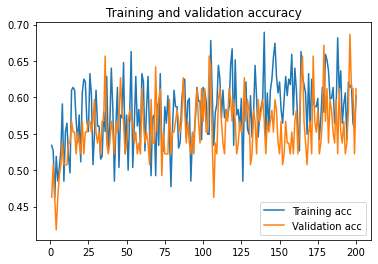

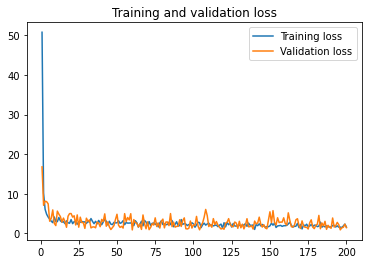

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy'] 
val_acc = history.history['val_accuracy'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

#Accuracy
plt.plot(epochs, acc, label='Training acc') 
plt.plot(epochs, val_acc, label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.legend()
plt.show()

#loss
plt.plot(epochs, loss,  label='Training loss') 
plt.plot(epochs, val_loss, label='Validation loss') 
plt.title('Training and validation loss') 
plt.legend()
plt.show()